### Importing Modules

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#### Getting URL of web page

In [42]:
URL = 'https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29'

#### Data Extraction and Processing

In [43]:
tables = pd.read_html(URL)  # Choosing the GDP table from the page

In [44]:
df = tables[3]
colNo = df.shape[1]
df.columns = range(colNo)
df = df[[0,2]]
df = df.iloc[1:11, :]
df.columns = ['Country', 'GDP (Million USD)']

In [45]:
df[['GDP (Million USD)']] = df[['GDP (Million USD)']].astype(int)

In [46]:
df[['GDP (Million USD)']] = df[['GDP (Million USD)']] / 1000

In [47]:
df[['GDP (Million USD)']] = np.round(df[['GDP (Million USD)']],2)

In [49]:
df_billion = df.rename(columns={'GDP (Million USD)' : 'GDP (Billion USD)'})

In [50]:
print(df_billion)
df_billion.to_csv('Largest_economies.csv')  # Writing results in csv file

           Country  GDP (Billion USD)
1    United States           26854.60
2            China           19373.59
3            Japan            4409.74
4          Germany            4308.85
5            India            3736.88
6   United Kingdom            3158.94
7           France            2923.49
8            Italy            2169.74
9           Canada            2089.67
10          Brazil            2081.24


### Ploting Bar Graph For Top 10 Countries by GDP

In [52]:
countries = np.array(df_billion['Country'])
gdp = np.array(df_billion['GDP (Billion USD)'])

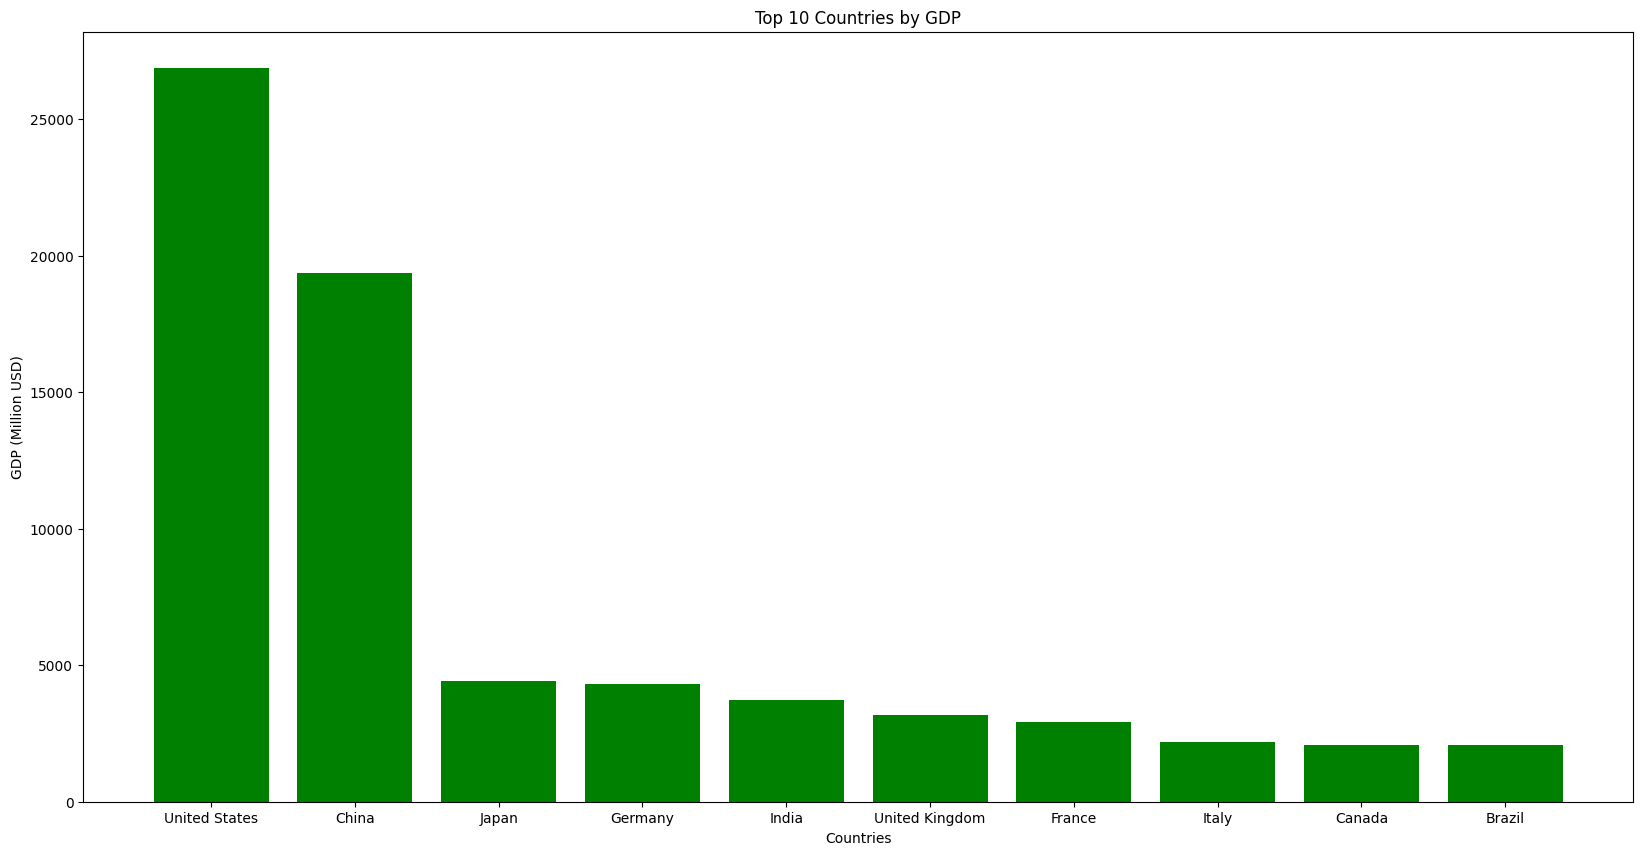

In [54]:
plt.figure(figsize=(20,10))
plt.title('Top 10 Countries by GDP')
plt.xlabel('Countries')
plt.ylabel('GDP (Million USD)')
plt.bar(countries, gdp, color='green')

plt.savefig('gdp_bar_plot.png')
plt.show()